In [2]:
## setting
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.style as style

# Ag_carrier data

In [3]:
## Carrier infor (Ag only)

carrier_ag = pd.read_csv('G:\AccidentData\AGRICULTURAL CARRIERS.txt', sep=",")

In [9]:
carrier_ag.head(5)

,DOT_NUMBER,LEGAL_NAME,DBA_NAME,CARRIER_OPERATION,CARGO_CLASSIFICATION_CODE,HM_FLAG,PASSENGER_FLAG,PHY_STREET,PHY_CITY,PHY_STATE,PHY_ZIP,PHY_COUNTRY,NBR_POWER_UNIT,TOTAL_DRIVERS
0,4,CONSOLIDATED GRANITE CO INC,NaN,A,P,NaN,NaN,1149 HARTWELL HIGHWAY,ELBERTON,GA,30635,US,1.0,1.0
1,9,COOPER BROTHERS INC,NaN,A,J,NaN,NaN,P O BOX 167,BRASELTON,GA,30517,US,NaN,NaN
2,65,CHEROKEE PRODUCTS COMPANY,NaN,A,W,NaN,NaN,HWY 22 EAST BOX 98,HADDOCK,GA,31033,US,8.0,6.0
3,82,BLUE VALLEY DAIRY FARM INC,NaN,A,P,NaN,NaN,RR 1 BOX 20,HOVEN,SD,57450-9714,US,4.0,1.0
4,87,RICKY L RUDEBUSCH,RUDEBUSCH TRUCKING,A,P,NaN,NaN,1320 E 1ST ST,WEBSTER,SD,57274,US,NaN,NaN


#### Variables

In [4]:
carrier_ag.columns

Index(['DOT_NUMBER', 'LEGAL_NAME', 'DBA_NAME', 'CARRIER_OPERATION',
       'CARGO_CLASSIFICATION_CODE', 'HM_FLAG', 'PASSENGER_FLAG', 'PHY_STREET',
       'PHY_CITY', 'PHY_STATE', 'PHY_ZIP', 'PHY_COUNTRY', 'NBR_POWER_UNIT',
       'TOTAL_DRIVERS'],
      dtype='object')

In [33]:
len(carrier_ag)

751616

In [30]:
# indicating carrier type (will drop regrefreigiated food carrier)
carrier_target = carrier_ag[(carrier_ag['CARGO_CLASSIFICATION_CODE']=='P')| (carrier_ag['CARGO_CLASSIFICATION_CODE']=='F')]


In [32]:
len(carrier_target)

284530

In [34]:
carrier_target['CARGO_CLASSIFICATION_CODE'].value_counts()

F    185370
P     99160
Name: CARGO_CLASSIFICATION_CODE, dtype: int64

In [102]:
15993/1509309


0.010596239736197161

# Merge Ag_carrier and Accident data 

In [15]:
carrier=pd.concat([carrier_ag,car_cencus],sort=False).drop_duplicates('DOT_NUMBER',keep='first').reset_index(drop=True)

In [19]:
len(carrier)

1948830

In [35]:
#3 call crash data
#crash_ag= pd.read_csv('CRASH DETAIL.txt',sep=",", encoding= "ISO-8859-1") Old data

crash_all= pd.read_csv('G:\AccidentData\crash_all.txt',sep=",", encoding= "ISO-8859-1")

In [36]:
len(crash_all)

1509309

In [37]:
df= pd.merge(crash_all, carrier_target, how='left', on ='DOT_NUMBER',indicator=True)

In [42]:
df['_merge'].value_counts()

left_only     1378807
both           130502
right_only          0
Name: _merge, dtype: int64

In [53]:
df['CARGO_CLASSIFICATION_CODE'].value_counts()

F    96856
P    33646
Name: CARGO_CLASSIFICATION_CODE, dtype: int64

In [44]:
df.columns

Index(['CRASH_ID', 'REPORT_STATE', 'REPORT_NUMBER', 'REPORT_DATE',
       'REPORT_TIME', 'DOT_NUMBER', 'LOCATION', 'CITY', 'STATE', 'COUNTY_CODE',
       'TRUCK_BUS_IND', 'AXLES', 'CARGO_BODY_TYPE_DESC', 'GVWR',
       'GVW_RATING_DESC', 'VEHICLE_IDENTIFICATION_NUMBER',
       'VEHICLE_LICENSE_NUMBER', 'VEHICLE_LIC_STATE', 'VEHICLE_HAZMAT_PLACARD',
       'VEHICLE_HAZMAT_MATERIAL', 'VEHICLE_CONFIGURATION_DESC',
       'HAZMAT_RELEASED', 'VEHICLES_IN_ACCIDENT', 'FATALITIES', 'INJURIES',
       'TOW_AWAY', 'TRAFFICWAY_DESC', 'ROAD_SURFACE_CONDITION_DESC',
       'WEATHER_CONDITION_DESC', 'LEGAL_NAME', 'DBA_NAME', 'CARRIER_OPERATION',
       'CARGO_CLASSIFICATION_CODE', 'HM_FLAG', 'PASSENGER_FLAG', 'PHY_STREET',
       'PHY_CITY', 'PHY_STATE', 'PHY_ZIP', 'PHY_COUNTRY', 'NBR_POWER_UNIT',
       'TOTAL_DRIVERS', '_merge'],
      dtype='object')

In [47]:
df.groupby(df._merge).size()

_merge
left_only     1378807
right_only          0
both           130502
dtype: int64

### Pure Grain and Log carring case.

In [50]:
df.CARGO_BODY_TYPE_DESC.value_counts()

VAN/ENCLOSED BOX                                642850
OTHER                                           233086
FLATBED                                         177481
DUMP                                            129154
CARGO TANK                                       91783
NOT APPLICABLE/NO CARGO BODY                     76542
GARBAGE/REFUSE                                   37829
GRAIN, CHIPS, GRAVEL                             32839
AUTO TRANSPORTER                                 17859
LOGGING                                          14268
CONCRETE MIXER                                   12806
INTERMODAL                                       12074
VEHICLE TOWING ANOTHER VEHICLE                    7039
POLE                                              6523
BUS (SEATS FOR > 15 PEOPLE, INCLUDING DRIVER        52
BUS (SEATS FOR 9-15 PEOPLE, INCLUDING DRIVER        10
Name: CARGO_BODY_TYPE_DESC, dtype: int64

In [52]:
firm_stat=df.groupby(by=['CARGO_CLASSIFICATION_CODE','CARGO_BODY_TYPE_DESC']).agg({'FATALITIES':sum, 'INJURIES':sum,
                                                       'DOT_NUMBER':"count"})
firm_stat

FATALITIES  \
CARGO_CLASSIFICATION_CODE CARGO_BODY_TYPE_DESC                         
F                         AUTO TRANSPORTER                        11   
                          CARGO TANK                              73   
                          CONCRETE MIXER                           7   
                          DUMP                                   159   
                          FLATBED                               1291   
                          GARBAGE/REFUSE                           9   
                          GRAIN, CHIPS, GRAVEL                   120   
                          INTERMODAL                              13   
                          LOGGING                                545   
                          NOT APPLICABLE/NO CARGO BODY           138   
                          OTHER                                  486   
                          POLE                                   121   
                          VAN/ENCLOSED BOX                       682   
                          VEHICLE TOWING ANOTHER VEHICLE           7   
P                         AUTO TRANSPORTER                         1   
                          CARGO TANK                             180   
                          CONCRETE MIXER                           3   
                          DUMP                                   254   
                          FLATBED                                116   
                          GARBAGE/REFUSE                          10   
                          GRAIN, CHIPS, GRAVEL                   368   
                          INTERMODAL                               4   
                          LOGGING                                  1   
                          NOT APPLICABLE/NO CARGO BODY            30   
                          OTHER                                  129   
                          POLE                                     0   
                          VAN/ENCLOSED BOX                       413   
                          VEHICLE TOWING ANOTHER VEHICLE           3   

                                                          INJURIES  DOT_NUMBER  
CARGO_CLASSIFICATION_CODE CARGO_BODY_TYPE_DESC                                  
F                         AUTO TRANSPORTER                     143         275  
                          CARGO TANK                          1077        1999  
                          CONCRETE MIXER                       136         295  
                          DUMP                                2847        4841  
                          FLATBED                            17739       33337  
                          GARBAGE/REFUSE                       276         465  
                          GRAIN, CHIPS, GRAVEL                1185        2115  
                          INTERMODAL                           299         529  
                          LOGGING                             5767        9723  
                          NOT APPLICABLE/NO CARGO BODY        2465        4291  
                          OTHER                               7105       13579  
                          POLE                                1504        2456  
                          VAN/ENCLOSED BOX                   11471       22038  
                          VEHICLE TOWING ANOTHER VEHICLE       121         243  
P                         AUTO TRANSPORTER                      50          88  
                          CARGO TANK                          2005        3810  
                          CONCRETE MIXER                        35          61  
                          DUMP                                2569        4461  
                          FLATBED                             1492        3045  
                          GARBAGE/REFUSE                        99         219  
                          GRAIN, CHIPS, GRAVEL                3269        6270  
                          INTERMOD

In [83]:
df['hopper_logger']=0

df['hopper_logger']=np.where((df['CARGO_CLASSIFICATION_CODE']=='F') & (df['CARGO_BODY_TYPE_DESC']=='LOGGING'), 1,df['hopper_logger'])

In [84]:
df['hopper_logger'].value_counts()

0    1499586
1       9723
Name: hopper_logger, dtype: int64

In [85]:
df['hopper_logger']=np.where((df['CARGO_CLASSIFICATION_CODE']=='P') & (df['CARGO_BODY_TYPE_DESC']=='GRAIN, CHIPS, GRAVEL'),1,df['hopper_logger'])

In [86]:
df['hopper_logger'].value_counts()

0    1493316
1      15993
Name: hopper_logger, dtype: int64

In [87]:

df.REPORT_DATE = pd.to_datetime(df.REPORT_DATE)

df['year'] = df['REPORT_DATE'].dt.year
df['month'] = df['REPORT_DATE'].dt.month

In [94]:
fig0_dt=pd.crosstab(df['month'],df['hopper_logger']).apply(lambda r: r/r.sum(), axis=0)
fig0_dt

hopper_logger,0,1
month,,
1,0.091573,0.087038
2,0.084728,0.076408
3,0.082619,0.078659
4,0.076848,0.072219
5,0.080857,0.073782
6,0.084128,0.080723
7,0.081561,0.079285
8,0.085693,0.088039
9,0.082534,0.093103


Text(0.5,0,'Month')

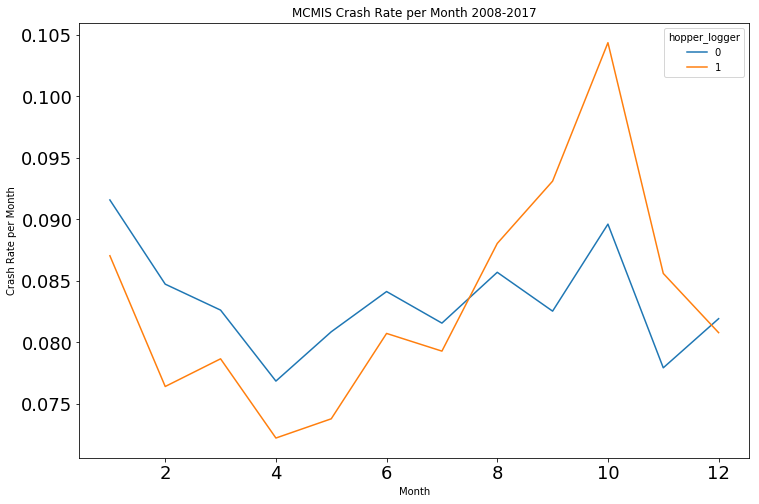

In [101]:
fig0=fig0_dt.plot(figsize = (12,8))
plt.title('MCMIS Crash Rate per Month 2008-2017')
fig0.tick_params(axis = 'both', which = 'major', labelsize = 18)
fig0.set_ylabel('Crash Rate per Month')
fig0.set_xlabel('Month')